# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

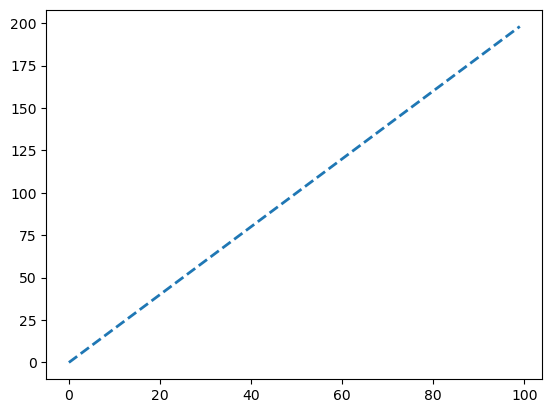

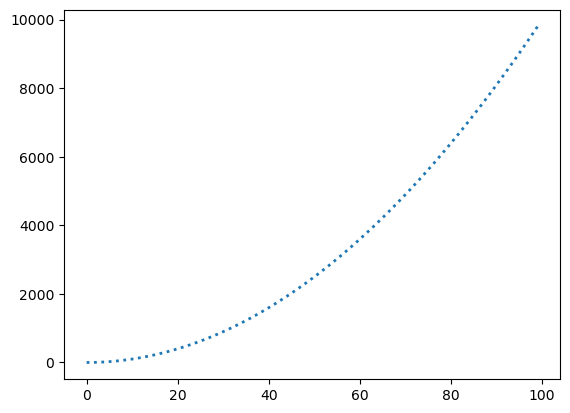

In [3]:
# Method 1

plt.plot(x,y, linewidth=2, linestyle='dashed')
plt.show()

plt.plot(x,z, linewidth=2, linestyle='dotted')
plt.show()


#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

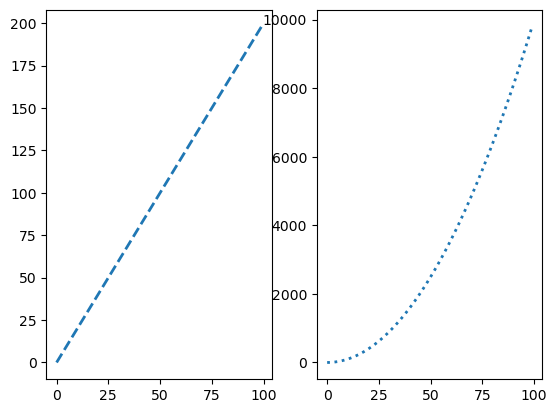

In [4]:
# Method 2

plot_options, (chart_1, chart_2) = plt.subplots(nrows=1, ncols=2)

chart_1.plot(x,y, linewidth=2, linestyle='dashed')

chart_2.plot(x,z, linewidth=2, linestyle='dotted')

plt.show()


#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

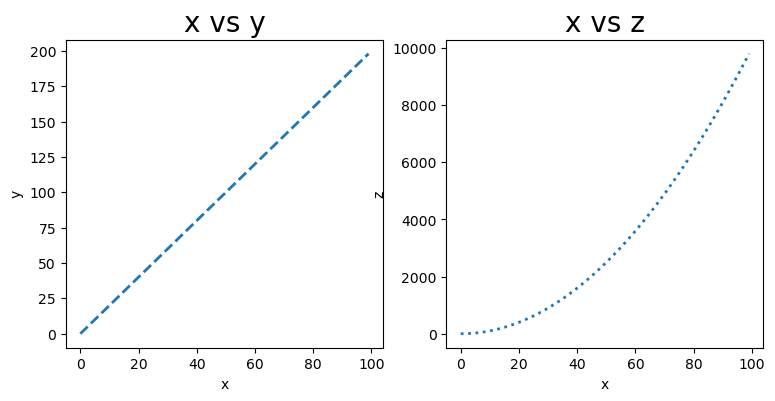

In [5]:
plot_options, (chart_1, chart_2) = plt.subplots(nrows=1, ncols=2, figsize=(9,4))

chart_1.plot(x,y, linewidth=2, linestyle='dashed')
chart_1.set_title("x vs y",fontsize=20)
chart_1.set_xlabel("x")
chart_1.set_ylabel("y")


chart_2.plot(x,z, linewidth=2, linestyle='dotted')
chart_2.set_title("x vs z",fontsize=20)
chart_2.set_xlabel("x")
chart_2.set_ylabel("z")


plt.show()


#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

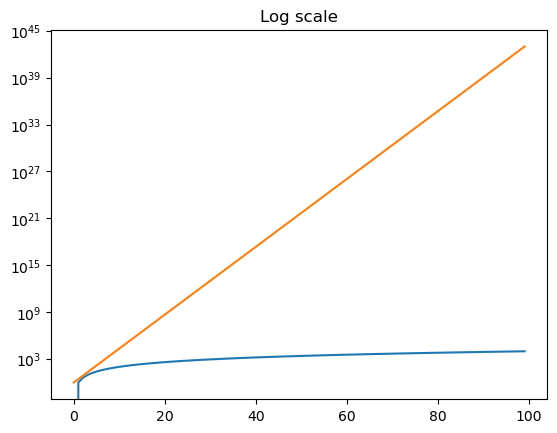

In [6]:
y = x**2

plt.plot(x,y)

y = np.exp(x)

plt.plot(x,y)
plt.yscale("log")
plt.title("Log scale")
plt.show()


#### As a bonus challenge, try to add a legend to the plot.

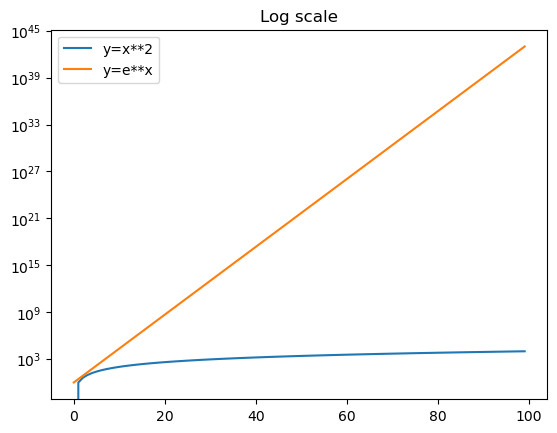

In [7]:
y = x**2

plt.plot(x,y, label="y=x**2")

y = np.exp(x)

plt.plot(x,y, label="y=e**x")
plt.yscale("log")
plt.legend()
plt.title("Log scale")
plt.show()


## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
fitbit = pd.read_csv("Fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

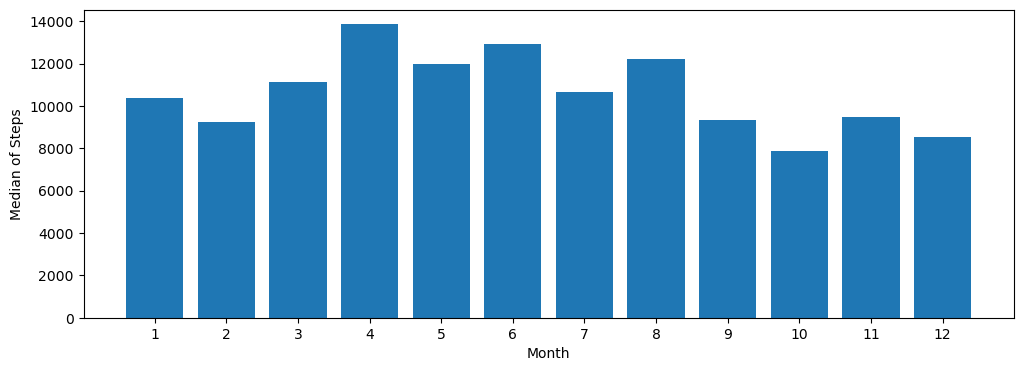

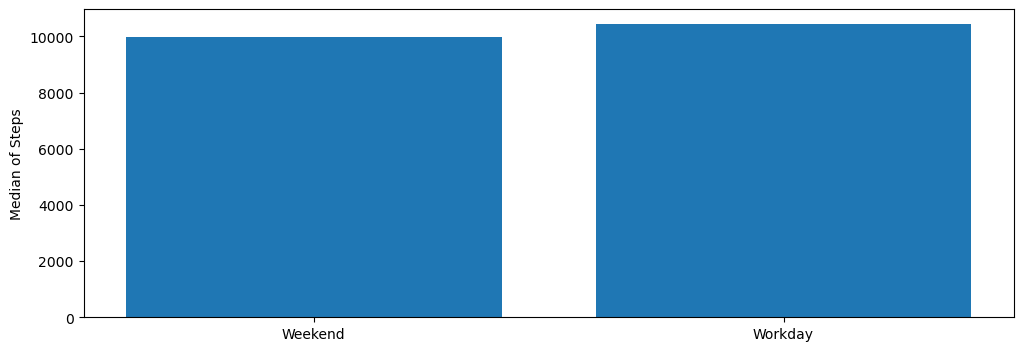

In [9]:
# MEDIAN STEPS BY MONTH_ENCODED

steps_per_month = fitbit.groupby("Months_encoded").agg({"Steps":"median"}).reset_index()

plt.figure(figsize=(12,4))
plt.bar(steps_per_month["Months_encoded"],steps_per_month["Steps"])
plt.xlabel("Month")
plt.ylabel("Median of Steps")
plt.xticks(steps_per_month["Months_encoded"])
plt.savefig("figures/plot_steps_by_month.png")
plt.show()

# MEDIAN STEPS BY WORK_OR_WEEKEND


steps_per_work_or_weekend = fitbit.groupby("Work_or_Weekend").agg({"Steps":"median"}).reset_index()
steps_per_work_or_weekend["Work_or_Weekend"] = steps_per_work_or_weekend["Work_or_Weekend"].replace(0,"Weekend").replace(1,"Workday")

plt.figure(figsize=(12,4))
plt.bar(steps_per_work_or_weekend["Work_or_Weekend"],steps_per_work_or_weekend["Steps"])
plt.ylabel("Median of Steps")
plt.savefig("figures/plot_steps_by_workday_weekend.png")
plt.show()

#Fitbitter is more active on workdays


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

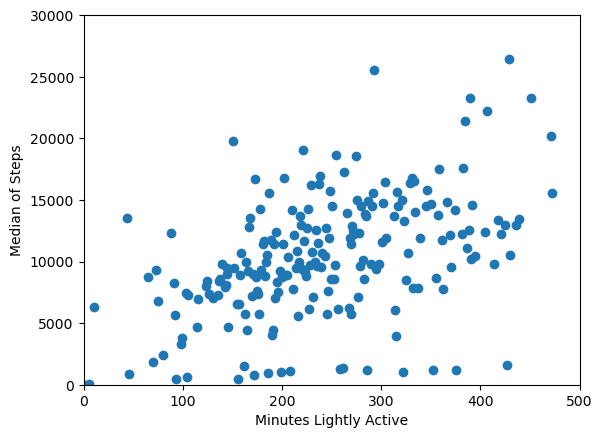

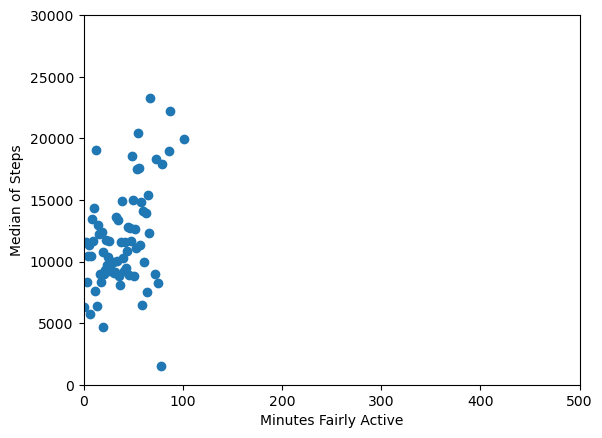

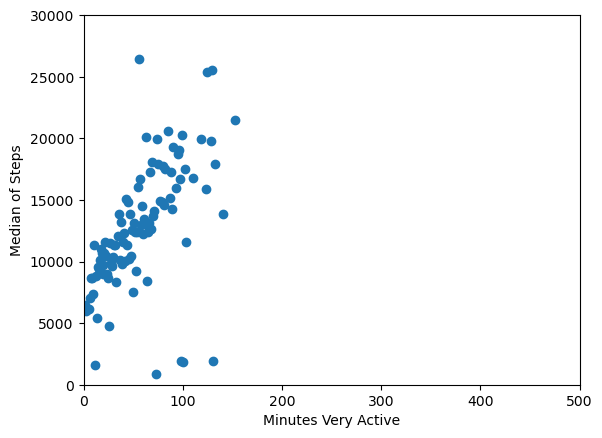

In [10]:
plot_list = ["Minutes Lightly Active","Minutes Fairly Active","Minutes Very Active"]

for plot in plot_list:
    steps_per_month = fitbit.groupby(plot).agg({"Steps":"median"}).reset_index()
    plt.scatter(steps_per_month[plot],steps_per_month["Steps"])
    plt.xlabel(plot)
    plt.ylabel("Median of Steps")
    plt.xlim(0,500)
    plt.ylim(0,30000)
    plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [11]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [12]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [13]:
# NUMERICAL VARIABLES
list(titanic.select_dtypes([int,float]).columns)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [14]:
# CATEGORICAL VARIABLES
list(titanic.select_dtypes(object).columns)

['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked']

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [15]:
plt.style.use('classic')
plt.figure(figsize=(12,4))

<Figure size 960x320 with 0 Axes>

<Figure size 960x320 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

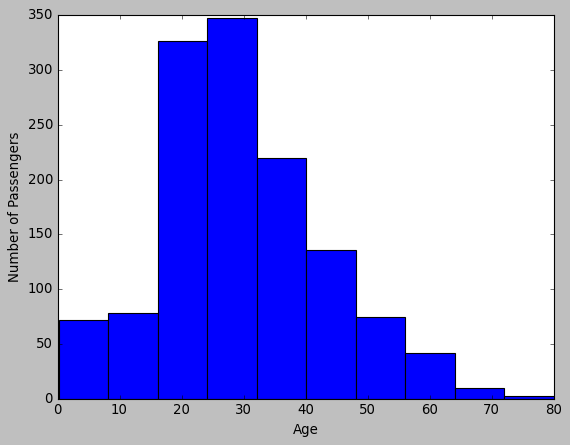

In [16]:
plt.hist(titanic["Age"])
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

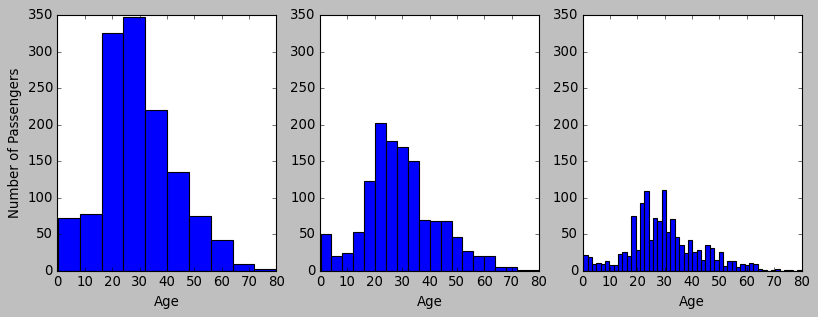

In [17]:
plot_options, (chart_1, chart_2, chart_3) = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

chart_1.hist(titanic["Age"], bins=10)
chart_1.set_xlabel("Age")
chart_1.set_ylabel("Number of Passengers")
chart_1.set_ylim(0,350)

chart_2.hist(titanic["Age"], bins=20)
chart_2.set_xlabel("Age")
chart_2.set_ylim(0,350)

chart_3.hist(titanic["Age"], bins=50)
chart_3.set_xlabel("Age")
chart_3.set_ylim(0,350)

plt.show()

#### How does the bin size affect your plot?

In [18]:
"""
The bin size affects the height of the bars. The higher the bins, the smaller the bars.
"""

'\nThe bin size affects the height of the bars. The higher the bins, the smaller the bars.\n'

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

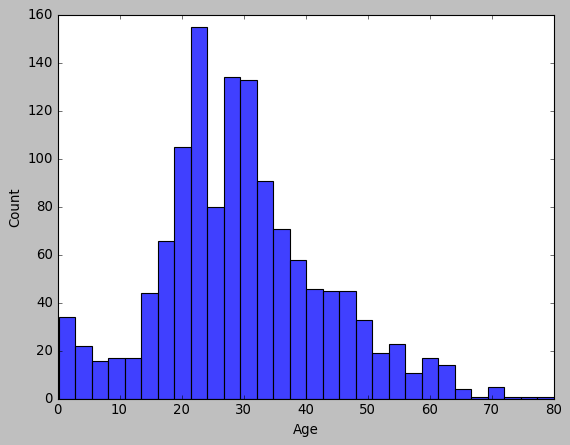

In [19]:
sns.histplot(titanic["Age"])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

Text(0, 0.5, 'number of passengers')

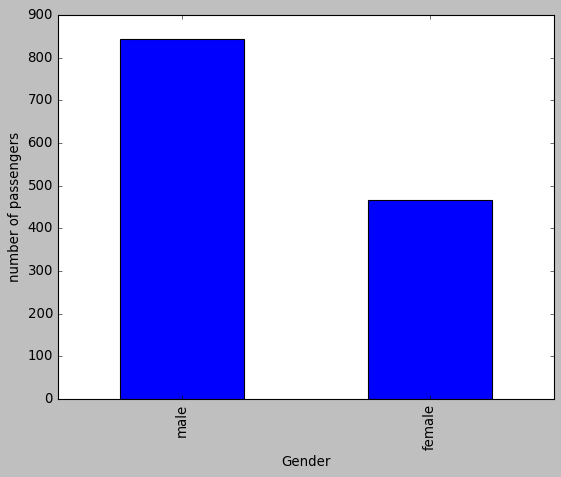

In [21]:
# Method 1 - matplotlib

titanic["Gender"].value_counts().plot(kind='bar')
plt.ylabel("number of passengers")

<AxesSubplot:xlabel='Gender', ylabel='count'>

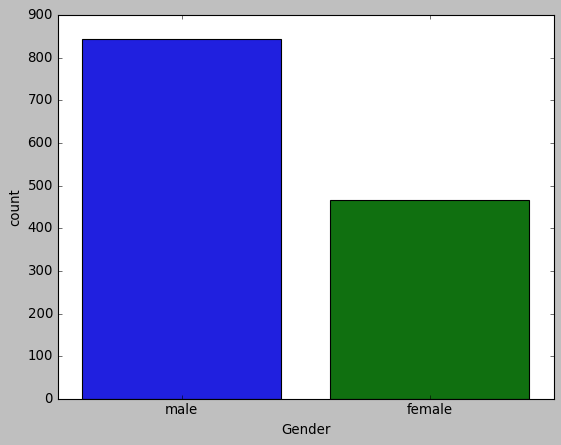

In [27]:
# Method 2 - seaborn

sns.countplot(x=titanic["Gender"])

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

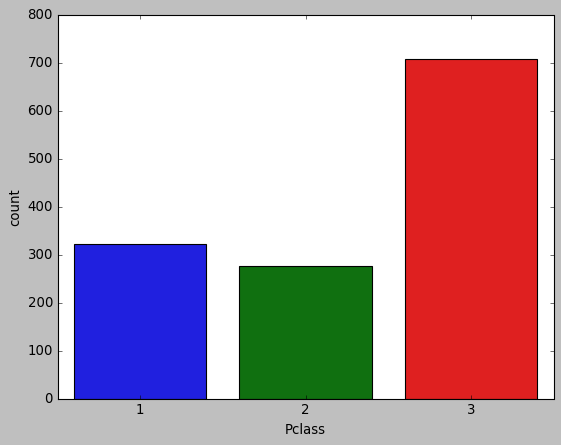

In [28]:
sns.countplot(x=titanic["Pclass"])

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:xlabel='Age'>

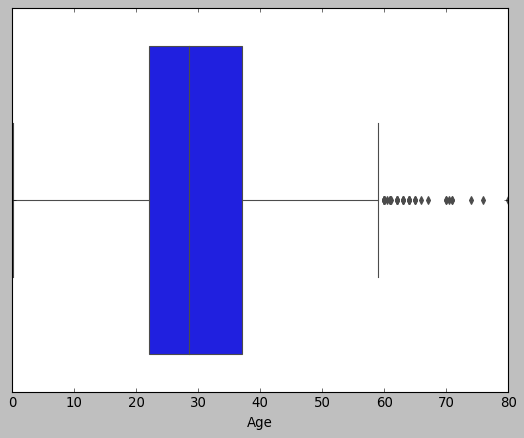

In [32]:
sns.boxplot(x=titanic["Age"])

In [ ]:
"""
Box plots are used to show distributions of numeric data values. 
They are built to provide high-level information at a glance, 
offering general information about a group of data's symmetry, 
skew, variance, and outliers.

"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
We can observe that the majority of the ages are 
between 20 and 40. We can also observe some outliers above 60.
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:xlabel='Age'>

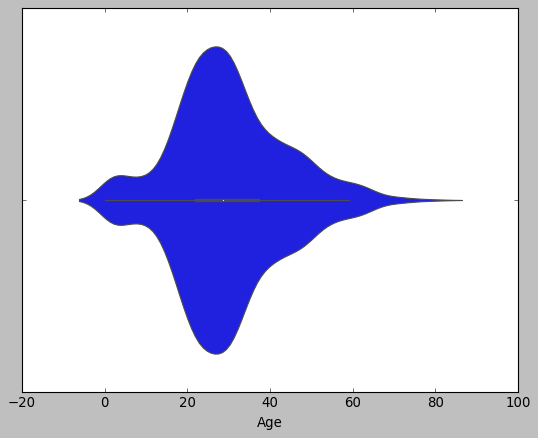

In [31]:
sns.violinplot(x=titanic["Age"])


#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
Comparing with the box plot, the violin plot shows how common a value is
by varying the thickness. The bigger the thickness, the more common a value.
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

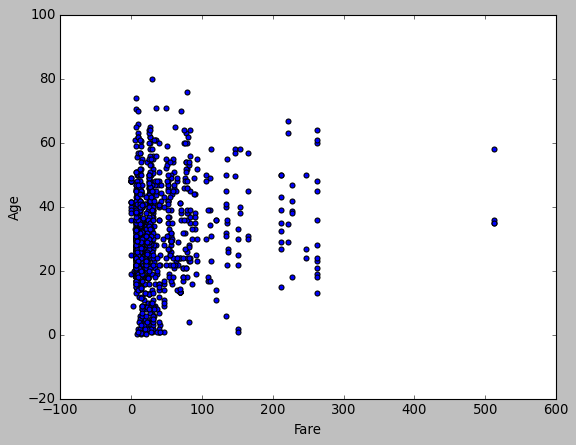

In [48]:
# Method 1 - matplotlib

plt.scatter(titanic["Fare"],titanic["Age"])
plt.xlabel("Fare")
plt.ylabel("Age")
plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Age'>

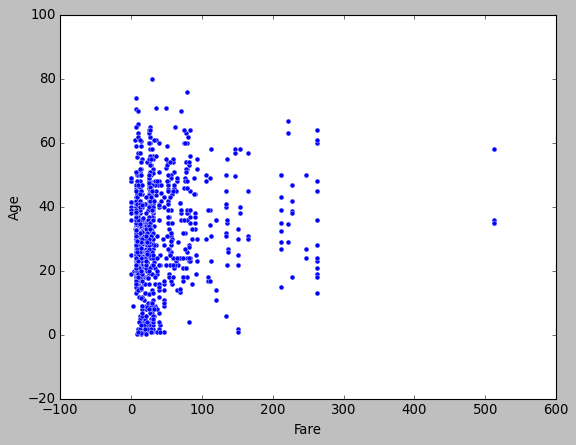

In [47]:
# Method 2 - seaborn

sns.scatterplot(x=titanic["Fare"],y=titanic["Age"],data=titanic)


#### Plot the correlation matrix using seaborn.

<AxesSubplot:>

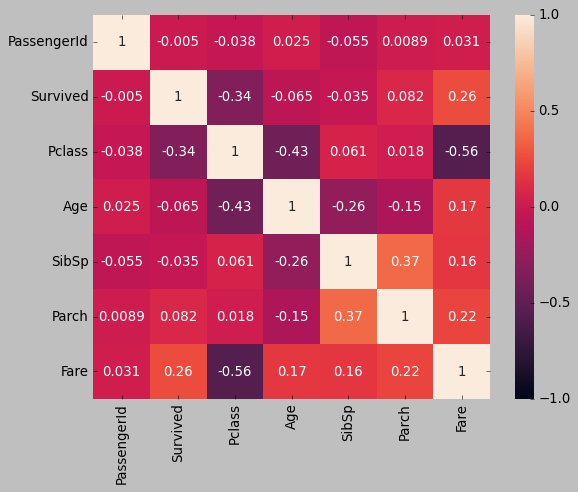

In [46]:
corr = titanic.corr(numeric_only=True)

sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

#### What are the most correlated features?

In [ ]:
"""
Pclass and Fare
Pclass and Age
Pclass and Survived
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

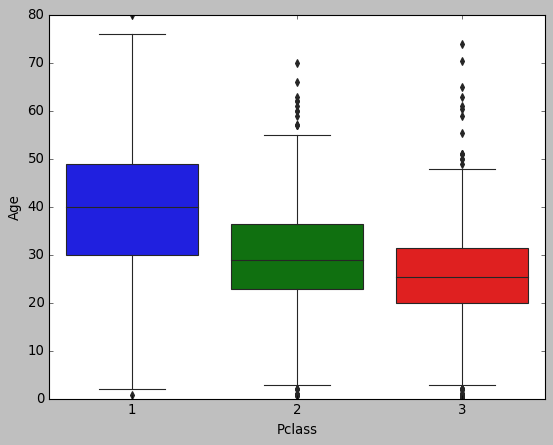

In [49]:
sns.boxplot(x="Pclass",y="Age", data = titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

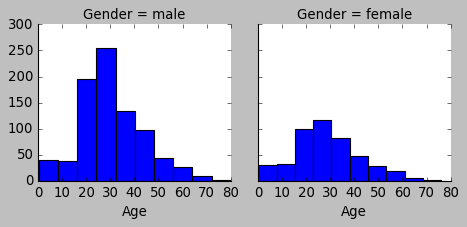

In [52]:
graph = sns.FacetGrid(titanic, col ="Gender")
graph.map(plt.hist, "Age", bins = 10)
plt.show()